In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv("communities.txt", header = None)

In [57]:
header=pd.read_csv("attributes.csv")
header

,attributes
0,state
1,county
2,community
3,communityname
4,fold
...,...
123,LemasPctPolicOnPatr
124,LemasGangUnitDeploy
125,LemasPctOfficDrugUn
126,PolicBudgPerPop


In [58]:
Header=header['attributes'].to_list()

In [59]:
df.columns = Header
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [60]:
df= df.replace('?',np.nan)
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [110]:
# TASK 1
X, y = make_regression(n_samples=100, n_features=1,  random_state=0, noise=4.0, bias=100.0)

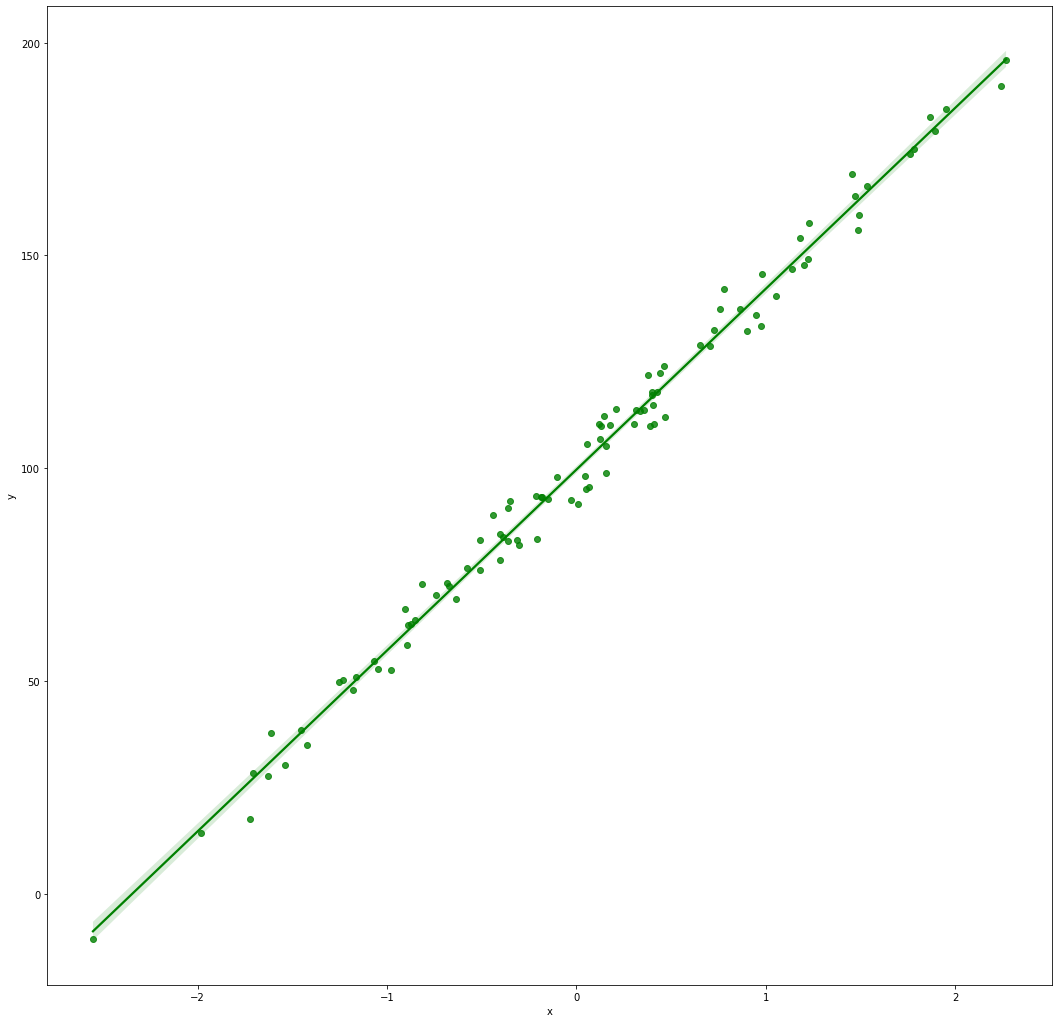

In [111]:
fig, ax = plt.subplots(figsize = (18, 18))
sns.regplot(x=X,y=y, color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [112]:
model = LinearRegression().fit(X, y)

In [113]:
# TASK 2
q1 = np.quantile(X, 0.25)
q3 = np.quantile(X, 0.75)
lf= q1-(1.5*(q3-q1))
uf= q3+(1.5*(q3-q1))
print(lf)
print(uf)

-2.715257734891628
2.8084784056068184


In [114]:
outliers=[[-3.45], [-10.53], [-7.46], [4.78], [8.92], [10.12]]
X1= np.append(X, outliers)

In [115]:
for i in range(0,6):
    y1=np.append(y, np.nan)

In [118]:
model1= LinearRegression()
reg= model1.fit(X, y)

In [119]:
prediction = model.predict(outliers)
prediction

array([ -46.87848158, -347.6303328 , -217.21957245,  302.72430591,
        478.58767654,  529.56256657])

In [121]:
Actual= np.array([])
for i in outliers:
    Actual= np.append(Actual, reg.coef_*i+reg.intercept_)
Actual

array([ -46.87848158, -347.6303328 , -217.21957245,  302.72430591,
        478.58767654,  529.56256657])

In [122]:
y2=np.append(y, prediction)
y2

array([  82.87374039,  133.37311226,  114.85482998,   72.78380292,
         63.14219634,  122.48617851,   52.61713803,  117.9372032 ,
        113.87712884,   83.13566732,   76.02257437,  106.94846534,
         30.33521899,   78.44832638,  128.8990423 ,  154.15509614,
         93.37362516,  174.96101098,  169.09441806,   73.05848152,
        145.60756737,  179.203727  ,   88.96541499,  113.6284555 ,
        137.42247988,  142.09165467,  184.34019989,  113.50775294,
         92.21458175,  166.4093299 ,   58.53574444,   76.51183863,
         52.91213628,  121.80795215,   91.57160565,  124.07901336,
        112.20226674,   84.52388428,   95.13199722,   49.75653146,
        140.56449665,  117.17424493,   28.4694471 ,  189.87343363,
        110.125134  ,   83.34114813,  157.5223093 ,   64.25813641,
        173.80595491,  110.43119187,   66.90151284,   35.09105877,
        112.13500056,  132.23837   ,  146.75733052,  118.00506134,
        109.91470772,   17.65409046,  163.91210575,   93.21566

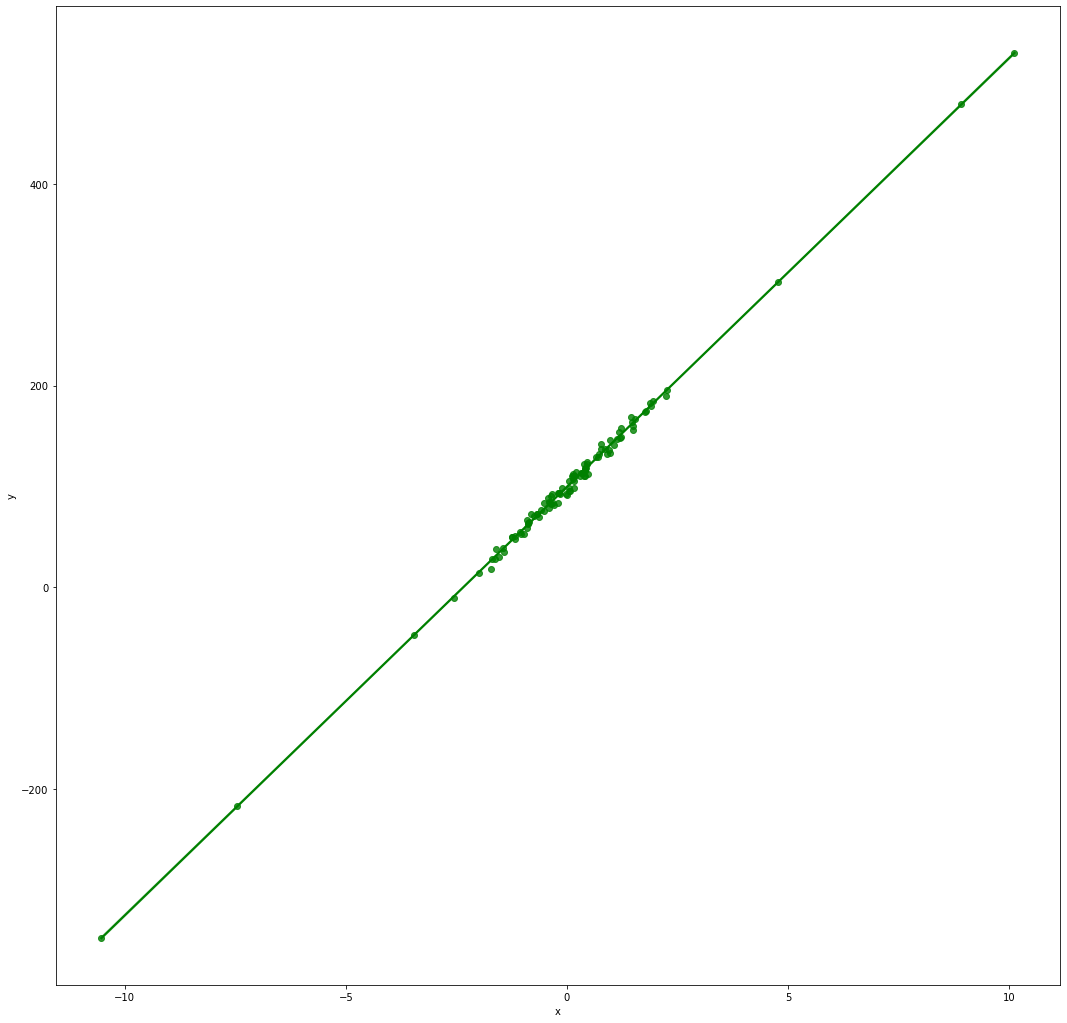

In [123]:
fig, ax = plt.subplots(figsize = (18, 18))
sns.regplot(x=X1,y=y2, color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [126]:
# TASK 3
df1= df.drop(['state  ', 'county  ', 'community  ', 'communityname', 'fold  '], axis = 1)
df1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [127]:
df1=df1.dropna(axis=0)
df1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1,0.35,0.73,0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0,0.62,0.15,0.07
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [155]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [163]:
lm = LinearRegression()
reg = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [164]:
predictions

array([ 1.21931474,  0.771266  ,  0.54462533,  0.44543703,  0.24733468,
        0.72273292,  0.16680649,  0.16558941,  0.11165217,  0.2687862 ,
        0.35319471,  0.21222369, -0.07338987,  0.64009618,  0.82323023,
        0.61138163,  0.43474799, -0.05398641,  0.48518578,  0.75316212,
        0.25807521,  0.05938036,  0.54720918,  0.25733682,  0.25866972,
        0.2298325 ,  0.26943666,  0.40152271,  0.05283034,  0.49161698,
        0.2814328 ,  0.01372278,  0.20474946,  0.65860895,  0.01081104,
        0.43955839,  0.04361468,  0.02009565,  0.69810182,  0.29212343,
        0.75450966,  0.7436671 ,  0.5216488 ,  0.31274492,  0.71943736,
        0.58173274,  0.30569147,  0.86284794,  0.56028261,  0.3303681 ,
        0.67655013,  0.70223619,  0.32095484,  0.38273827,  0.35338248,
        0.49276054,  0.30146001,  0.22132609,  0.03866758,  0.61459607,
        0.42393492,  0.5499259 ,  0.46255662,  0.23022404,  0.61204648,
        0.35785725,  0.23836009,  0.15186744,  0.53520565,  0.59

In [165]:
# TASK 4
import math
MSE= mean_squared_error(predictions,y_test)
RMSE=math.sqrt(MSE)
RMSE

0.22330126337961892

In [167]:
reg.score(X, y)

0.7089265707595187

In [168]:
reg.score(X_test,predictions)

1.0

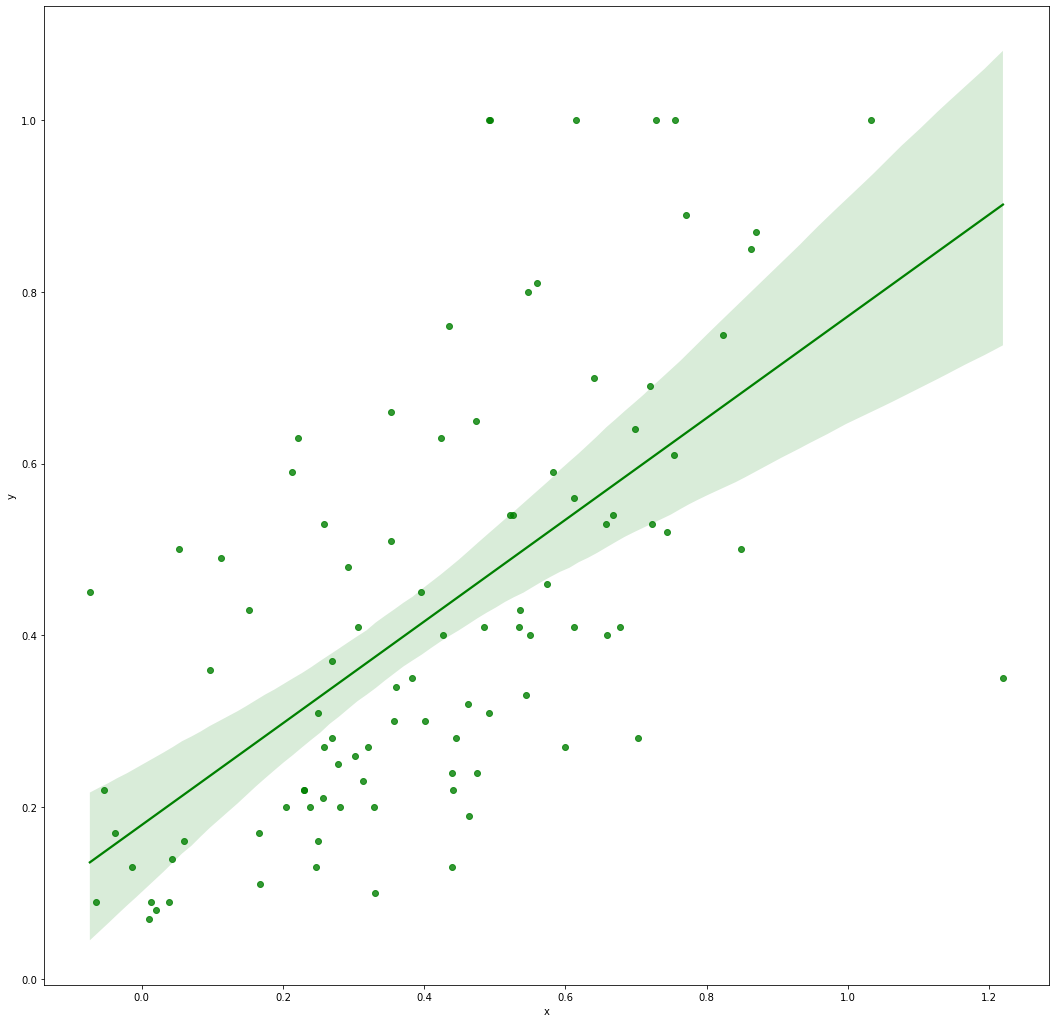

In [170]:
fig, ax = plt.subplots(figsize = (18, 18))
sns.regplot(x=predictions,y=y_test, color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()